# Basic Synthesis of Single-Qubit Gates

In [1]:
import numpy as np

from qiskit import *
from qiskit.visualization import plot_histogram

Show that the Hadamard gate (here given in the $z$ eigenbasis),

$$
H
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}=\frac{\sigma_x+\sigma_z}{\sqrt{2}}\tag{1},
$$

can be written as,

$$
H=\exp\left\{i\frac{\pi}{2}H+i\varphi\right\}\tag{2},
$$

with the Pauli matrices,

$$
\begin{align}
\sigma_x=\begin{pmatrix}0 & 1\\ 1 & 0\end{pmatrix}, &&
\sigma_z=\begin{pmatrix}1 & 0\\ 0 & -1\end{pmatrix}.\tag{3}
\end{align}
$$

## Generator of the Hadamard gate

To show the first equal in (2), we just have to insert (3).

To show the second equal in (2), we first note that the Pauli matrices are unitary and hermetian,

$$
U^{-1}=U^\dagger=U\in\mathbb{C}^{2\times2}.
$$

If a matrix $U$ is hermetian and unitary it follows that,

$$
\mathbb{1}=UU^{-1}=U^2,
$$

is true.
We can generalize the previous result for $n\in\mathbb{N}_0$,

$$
\begin{align}
U^{2n}=\left(U^2\right)^n=\left(\mathbb{1}\right)^n=\mathbb{1}, &&
U^{2n+1}=U\left(U^2\right)^n=U. &&
\end{align}
$$

Using the previous result, we can evaluate the exponential of a hermitian and unitary matrix $U$ with a prefactor $\phi\in\mathbb{R}$,

$$
\begin{align}
\exp(i\phi U)
&=\sum^\infty_{n=0}\frac{1}{n!}(i\phi U)^n\\
&=\sum^\infty_{n=0}\frac{1}{(2n)!}(i\phi)^{2n}U^{2n}+\sum^\infty_{n=0}\frac{1}{(2n+1)!}(i\phi)^{2n+1}U^{2n+1}\\
&=\mathbb{1}\sum^\infty_{n=0}\frac{1}{(2n)!}(i\phi)^{2n}+U\sum^\infty_{n=0}\frac{1}{(2n+1)!}(i\phi)^{2n+1}.
\tag{3}
\end{align}
$$

We remind ourselves of the identity,

$$
e^{i\phi}=\cos\phi+i\sin\phi,
$$

yielding,

$$
\begin{align}
\cos\phi
=\sum^\infty_{n=0}\frac{(-1)^n}{(2n)!}\phi^{2n},
&&
\sin\phi
=i\sum^\infty_{n=0}\frac{(-1)^n}{(2n+1)!}\phi^{2n+1}.
\tag{4}
\end{align}
$$

Using (4), we can rewrite (3) as,

$$
\exp(i\phi U)
=\cos\phi+iU\sin\phi.
$$

We are left to identify $U=H=(\sigma_x+\sigma_z)/\sqrt{2}$ and $\phi=\pi/2$, yielding,

$$
\exp\left\{i\frac{\pi}{2}H\right\}
=iH=H\exp\frac{i\pi}{2},
$$

which proves the required statement.

## First approximation to the Hadamard gate

With the previous result,
$$
\exp{i\frac{\pi}{2}H}=H\exp(i\varphi),
$$
we will show that,
$$
H_n=\left(R_x(\theta/n)R_z(\theta/n)\right)^n,\tag{5}
$$
is a finite approximation of the Hadamard gate with,
$$
\begin{align}
R_x(\theta)=\exp\{i\theta\sigma_x/2\}, &&
R_z(\theta)=\exp\{i\theta\sigma_z/2\},
\end{align}
$$
being the rotation operators generated by the Pauli matrices $\sigma_x,\sigma_z$.

We remark that the product of two exponentials with non-commuting argument is given by the Baker-Camphell-Haussdorff formula,

$$
e^Xe^Y=e^{X+Y+\frac{1}{2}[X,Y]+\dots}.
$$

For the product of our rotation matrices we find,

$$
R_x(\theta/n)R_z(\theta/n)=\exp\{\frac{i\theta}{2n}(\sigma_x+\sigma_z)+i(\frac{\theta}{n})^2\sigma_y+\dots\}.
$$

For $n\to\infty$ the second term will vanish and we will obtain the Hadamard gate (up to a global phase) for the choice,

$$\theta=\frac{\pi}{\sqrt{2}}.$$

This can be seen when we compare the first term with the generator expression of the Hadamard gate.

Writing out the exponential series we find,
$$
\begin{align}
R_x(\frac{\pi}{\sqrt{2}n})R_z(\frac{\pi}{\sqrt{2}n})
&=\exp\{\frac{i\pi}{2n}H+i(\frac{\pi}{2n})^2\frac{\sigma_y}{2}+\dots\}\\
&=\sum^\infty_{m=0}\frac{1}{m!}\left(\frac{i\pi}{2n}H+i(\frac{\pi}{2n})^2\frac{\sigma_y}{2}+\dots\right)^m\\
&=\sum^\infty_{m=0}\frac{1}{m!}(\frac{i\pi}{2n}H)^m+i(\frac{\pi}{2n})^2\frac{\sigma_y}{2}+\mathcal{O}(\frac{1}{n^3})\\
&=\exp(\frac{i\pi}{2n}H)+\frac{i\pi^2}{8n^2}\sigma_y+\mathcal{O}(\frac{1}{n^3}).\tag{6}
\end{align}
$$

We insert (6) into (5) and find that the first finite approximation of the Hadamard gate is,
$$
H_n=\left(\exp(\frac{i\pi}{2n}H)+\frac{i\pi^2}{8n^2}\sigma_y+\mathcal{O}(\frac{1}{n^3})\right)^n,
$$
which asymptotically for $n\to\infty$ approaches,
$$
\begin{align}
H_n
&=\exp(\frac{i\pi}{2n}H)^n+\frac{i\pi^2}{8n^2}[\exp(\frac{i\pi}{2n}H),\sigma_y]+\mathcal{O}(\frac{1}{n^3})\\
&=H\exp{i\varphi}+\frac{i\pi^2}{8n^2}\exp{i\varphi}[H,\sigma_y]++\mathcal{O}(\frac{1}{n^3}).
\end{align}
$$

We will neglect the global phase as has no effect on the expected values. The commutator of $H$ with $\sigma_y$ is,
$$
[H,\sigma_y]=\frac{1}{\sqrt{2}}[\sigma_x+\sigma_z,\sigma_y]=i\sqrt{2}\left(\sigma_z-\sigma_x\right).
$$

Our final result is,
$$
H_n=H+\frac{i\pi^2}{\sqrt{2}n^2}(\sigma_z-\sigma_x)+\mathcal{O}(\frac{1}{n^3}).\tag{7}
$$
In words our first finite approximation of order $n$ to the Hadamard gate introduces an error that decreases with $1/n^2$.

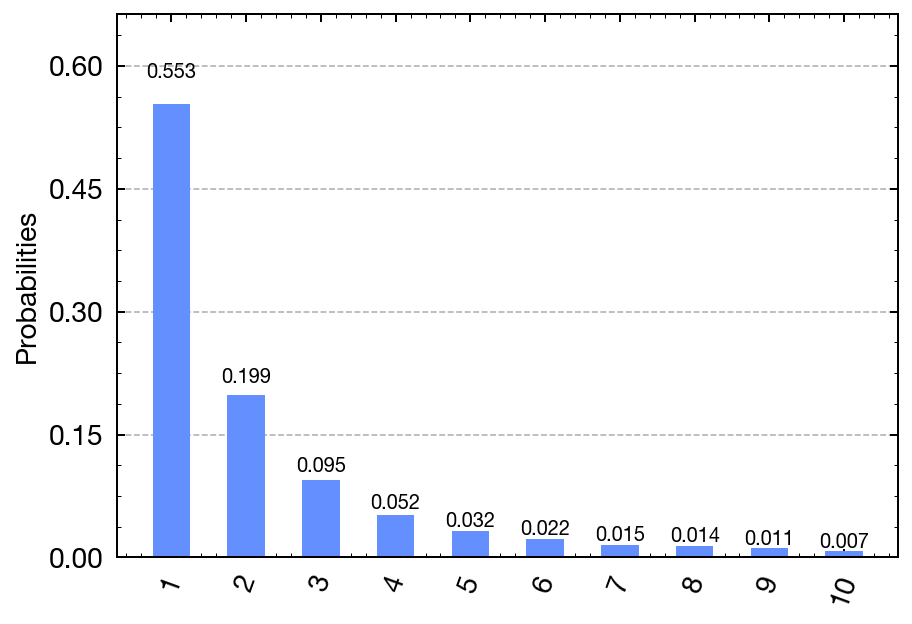

In [6]:
error = {}

theta = np.pi / np.sqrt(2)

for n in range(1,11):
    qc = QuantumCircuit(1, 1)
    
    for j in range(n):
        qc.rx(theta/n, 0)
        qc.rz(theta/n, 0)

    qc.h(0)
    qc.measure(0, 0)
    
    shots = 20000
    job = execute(qc, Aer.get_backend('qasm_simulator'),shots=shots)
    try:
        error[n] = (job.result().get_counts()['1']/shots)
    except:
        pass
        
plot_histogram(error)

We would like to compare the above simulation result with our error estimate.

The above simulation uses,

$$
\begin{align}
\vert0\rangle=\vert z_+\rangle=\begin{pmatrix}1 \\ 0\end{pmatrix}, &&
\vert1\rangle=\vert z_-\rangle=\begin{pmatrix}0 \\ 1\end{pmatrix},
\end{align}
$$

as basis. The measurement yields,

$$
\vert\langle 0\vert H_n H\vert0\rangle\vert^2
\xrightarrow{n\to\infty}
\vert\langle 0\vert H H\vert0\rangle\vert^2
=
\vert\langle 0\vert0\rangle\vert^2
=1,
$$

for infinite $H_n$. For finite $H_n$, we have to first find the state in superposition to $\vert 0\rangle$ introduced by the error term.

Let's recap how the (exact) Hadamard acts on the initial $\vert0\rangle$ state,

$$
H\vert0\rangle
=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\ 1 & -1\end{pmatrix}\begin{pmatrix}1 \\ 0\end{pmatrix}
=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}.
$$

For the finite Hadamard approximation we have,

$$
H_nH\vert0\rangle
=H\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}+\frac{i\pi^2}{\sqrt{2}n^2}\begin{pmatrix}1 & -1\\ -1 & -1\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}
=\vert0\rangle-\frac{i\pi^2}{n^2}\vert 1\rangle,
$$

**this cannot be true**

In [8]:
def estimate_error(n, theta):
    return np.pi**2 / n**2

[estimate_error(n, theta) for n in range(1, 11)]

[9.869604401089358,
 2.4674011002723395,
 1.096622711232151,
 0.6168502750680849,
 0.3947841760435743,
 0.27415567780803773,
 0.20142049798141548,
 0.15421256876702122,
 0.12184696791468343,
 0.09869604401089357]